Mean Absolute Error: 218.69837213642526
R² Score: -0.0599417023564488


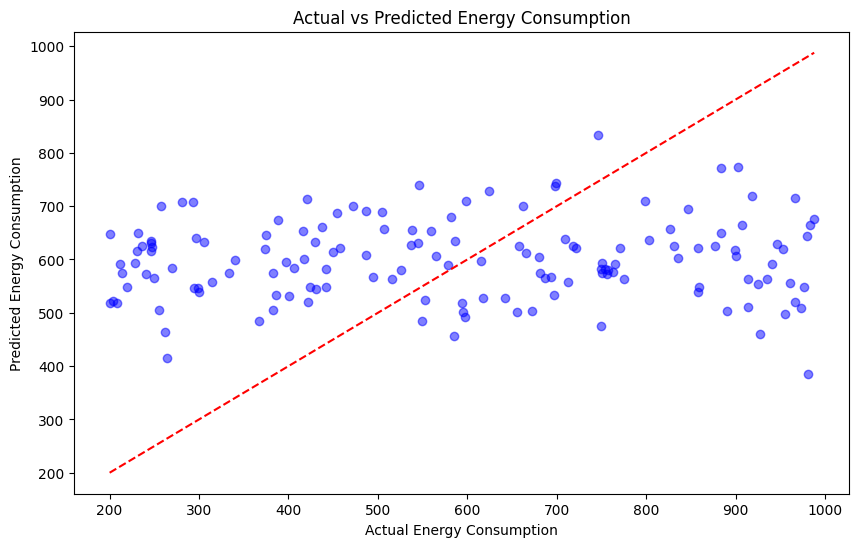

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset (replace 'building_energy_data.csv' with actual dataset file)
data = pd.read_csv('/content/building_energy_data.csv')

# Handle categorical variables (if 'weather_condition' is categorical)
data = pd.get_dummies(data, columns=['weather_condition'], drop_first=True)

# Select features (updated to reflect dummified columns)
features = ['occupancy', 'temperature', 'humidity'] + [col for col in data.columns if col.startswith('weather_condition_')]
target = 'energy_consumption'

# Splitting data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

# Plot actual vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Actual vs Predicted Energy Consumption')
plt.show()
